In [109]:
library(ape)
library(castor)
library(data.table)
library(ggplot2)
library(ggpubr)


## 1. branching index

X,sample,terminal,nonterminal,branching_factor,pearsonr,spearmanr,cat,branching_index
<int>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
0,68_N,776,648,2.195988,0.8747395,0.8406234,SMALT tree,0.8361290
1,71_N,661,620,2.064516,0.7793936,0.6772033,SMALT tree,0.9393939
2,72_N,2285,2043,2.117964,0.9555236,0.8818735,SMALT tree,0.8944834
3,75_N,1228,1073,2.143523,0.9698487,0.9192654,SMALT tree,0.8744906


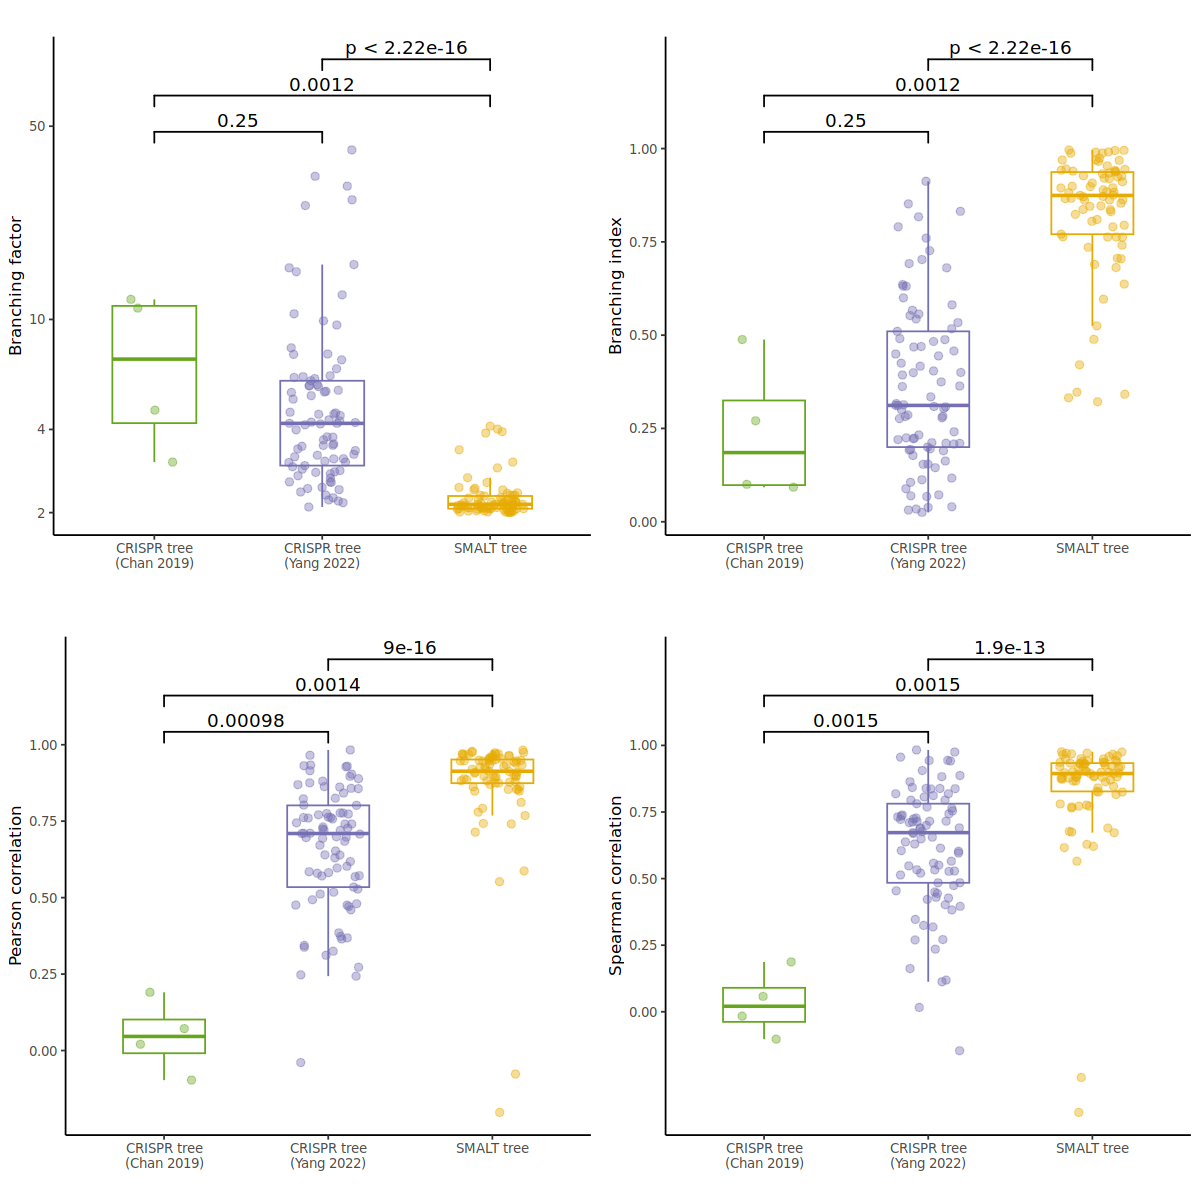

In [111]:
INDIR = "/data2/kantian/LineageTracing/SMALT/0.Results/4.tree_resolution/correlation/"
setwd(INDIR)
OUTDIR = "/data2/kantian/LineageTracing/SMALT/0.Results/figures/"
x <- read.delim("smalt_tree.csv", sep=",",header= TRUE)
x$cat = "SMALT tree"
y <- read.delim("crispr_tree_chan.csv", sep=",",header= TRUE)
y$cat = "CRISPR tree\n(Chan 2019)"
y$sample = "no"
z <- read.delim("crispr_tree_yang.csv", sep=",",header= TRUE)
z$cat = "CRISPR tree\n(Yang 2022)"
z$sample <- "no"
dt <- rbind(x,y,z)
setDT(dt)
dt[,branching_index:= nonterminal/(terminal-1)]
dt[1:4,]

cols = c("#66A61E","#7570B3","#E6AB02","#E7298A")
my_comparisons <- list(c("SMALT tree","CRISPR tree\n(Chan 2019)"),c("SMALT","CRISPR tree\n(Yang 2022)"))
dt$cat <- factor(dt$cat, levels = c("CRISPR tree\n(Chan 2019)","CRISPR tree\n(Yang 2022)","SMALT tree"))
my_comparisons <- list(split(t(combn(levels(dt$cat), 2)), seq(nrow(t(combn(levels(dt$cat), 2))))))
p1 <- ggplot(dt, aes(x=cat, y=branching_factor,color=cat))+
    geom_boxplot(width=0.5,outlier.shape = NA) +
    geom_jitter(width = 0.2,cex=2,alpha=0.4) +
    scale_y_log10(breaks=c(2,4,10,50))+
    labs(x="", y="Branching factor",title="")+
    theme_classic() +
    theme(text = element_text(size=10), legend.position="none") +
    geom_signif(comparisons = split(t(combn(levels(dt$cat), 2)), seq(nrow(t(combn(levels(dt$cat), 2))))), 
              map_signif_level = FALSE, colour = "black", step_increase = .1)+
    scale_color_manual(values=cols)
p2 <- ggplot(dt, aes(x=cat, y=branching_index,color=cat))+
    geom_boxplot(width=0.5,outlier.shape = NA) +
    geom_jitter(width = 0.2,cex=2,alpha=0.4) +
    scale_y_continuous(breaks=c(0,0.25,0.5,0.75,1))+
    labs(x="", y="Branching index",title="")+
    theme_classic() +
    theme(text = element_text(size=10), legend.position="none") +
    geom_signif(comparisons = split(t(combn(levels(dt$cat), 2)), seq(nrow(t(combn(levels(dt$cat), 2))))), 
              map_signif_level = FALSE, colour = "black", step_increase = .1)+
    scale_color_manual(values=cols)
p3 <- ggplot(dt, aes(x=cat, y=pearsonr,color=cat))+
    geom_boxplot(width=0.5,outlier.shape = NA) +
    geom_jitter(width = 0.2,cex=2,alpha=0.4) +
    scale_y_continuous(breaks=c(0,0.25,0.5,0.75,1))+
    labs(x="", y="Pearson correlation",title="")+
    theme_classic() +
    theme(text = element_text(size=10), legend.position="none") +
    geom_signif(comparisons = split(t(combn(levels(dt$cat), 2)), seq(nrow(t(combn(levels(dt$cat), 2))))), 
              map_signif_level = FALSE, colour = "black", step_increase = .1)+
    scale_color_manual(values=cols)
p4 <- ggplot(dt, aes(x=cat, y=spearmanr,color=cat))+
    geom_boxplot(width=0.5,outlier.shape = NA) +
    geom_jitter(width = 0.2,cex=2,alpha=0.4) +
    scale_y_continuous(breaks=c(0,0.25,0.5,0.75,1))+
    labs(x="", y="Spearman correlation",title="")+
    theme_classic() +
    theme(text = element_text(size=10), legend.position="none") +
    geom_signif(comparisons = split(t(combn(levels(dt$cat), 2)), seq(nrow(t(combn(levels(dt$cat), 2))))), 
              map_signif_level = FALSE, colour = "black", step_increase = .1)+
    scale_color_manual(values=cols)
# p2 <- ggplot(dt, aes(x=cat, y=branching_index,color=cat))+
#     geom_boxplot(width=0.5,outlier.shape = NA) +
#     geom_jitter(width = 0.2,cex=2) +
#   labs(x="", y="branching_index",title="")+
#   theme_classic() +
#   #scale_y_log10(expand=expansion(mult=c(0.1,0.1))) +
#   theme(text = element_text(size=10), legend.position="none") +
#   stat_compare_means(comparisons = my_comparisons)+
#   scale_color_manual(values=cols)
options(repr.plot.width = 10, repr.plot.height =10)
ggarrange(p1,p2,p3,p4,ncol=2,nrow=2)
# pdf(file = paste0(OUTDIR,"1.4.tree_correlation_crispr_smalt.pdf"), height = 8, width = 8)
# ggarrange(p1,p2,p3,p4,ncol=2,nrow=2)
# dev.off()


In [112]:
dt[1:4,]

X,sample,terminal,nonterminal,branching_factor,pearsonr,spearmanr,cat,branching_index
<int>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
0,68_N,776,648,2.195988,0.8747395,0.8406234,SMALT tree,0.8361290
1,71_N,661,620,2.064516,0.7793936,0.6772033,SMALT tree,0.9393939
2,72_N,2285,2043,2.117964,0.9555236,0.8818735,SMALT tree,0.8944834
3,75_N,1228,1073,2.143523,0.9698487,0.9192654,SMALT tree,0.8744906


In [115]:
mean(dt[cat=="SMALT tree",branching_index])/mean(dt[!cat=="SMALT tree",branching_index])

[1] 2.312628

In [ ]:
"CRISPR tree\n(Chan 2019)","CRISPR tree\n(Yang 2022)","SMALT tree"

In [47]:
wilcox.test(dt[cat=="SMALT tree",bifurcating_index],dt[cat=="CRISPR tree\n(Chan 2019)",bifurcating_index],paired=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  dt[cat == "SMALT tree", bifurcating_index] and dt[cat == "CRISPR tree\n(Chan 2019)", bifurcating_index]
W = 303, p-value = 0.001208
alternative hypothesis: true location shift is not equal to 0


## 2. mutation and phylogenetic distance correlation

In [99]:
INDIR = "/data2/kantian/LineageTracing/SMALT/0.Results/4.tree_resolution/correlation/"
setwd(INDIR)
OUTDIR = "/data2/kantian/LineageTracing/SMALT/0.Results/figures/"
x <- read.delim("smalt_tree.csv", sep=",",header= TRUE)
x$cat = "SMALT tree"
y <- read.delim("crispr_tree_chan.csv", sep=",",header= TRUE)
y$cat = "CRISPR tree\n(Chan 2019)"
y$sample = "no"
z <- read.delim("crispr_tree_yang.csv", sep=",",header= TRUE)
z$cat = "CRISPR tree\n(Yang 2022)"
z$sample <- "no"
dt <- rbind(x,y,z)
setDT(dt)
dt[,branching_index:= nonterminal/(terminal-1)]
dt[1:4,]

cols = c("#66A61E","#7570B3","#E6AB02","#E7298A")
my_comparisons <- list(c("SMALT tree","CRISPR tree\n(Chan 2019)"),c("SMALT","CRISPR tree\n(Yang 2022)"))
dt$cat <- factor(dt$cat, levels = c("CRISPR tree\n(Chan 2019)","CRISPR tree\n(Yang 2022)","SMALT tree"))
my_comparisons <- list(split(t(combn(levels(dt$cat), 2)), seq(nrow(t(combn(levels(dt$cat), 2))))))


X,sample,terminal,nonterminal,branching_factor,pearsonr,spearmanr,cat,branching_index
<int>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
0,68_N,776,648,2.195988,0.8747395,0.8406234,SMALT tree,0.8361290
1,71_N,661,620,2.064516,0.7793936,0.6772033,SMALT tree,0.9393939
2,72_N,2285,2043,2.117964,0.9555236,0.8818735,SMALT tree,0.8944834
3,75_N,1228,1073,2.143523,0.9698487,0.9192654,SMALT tree,0.8744906


png 
  2

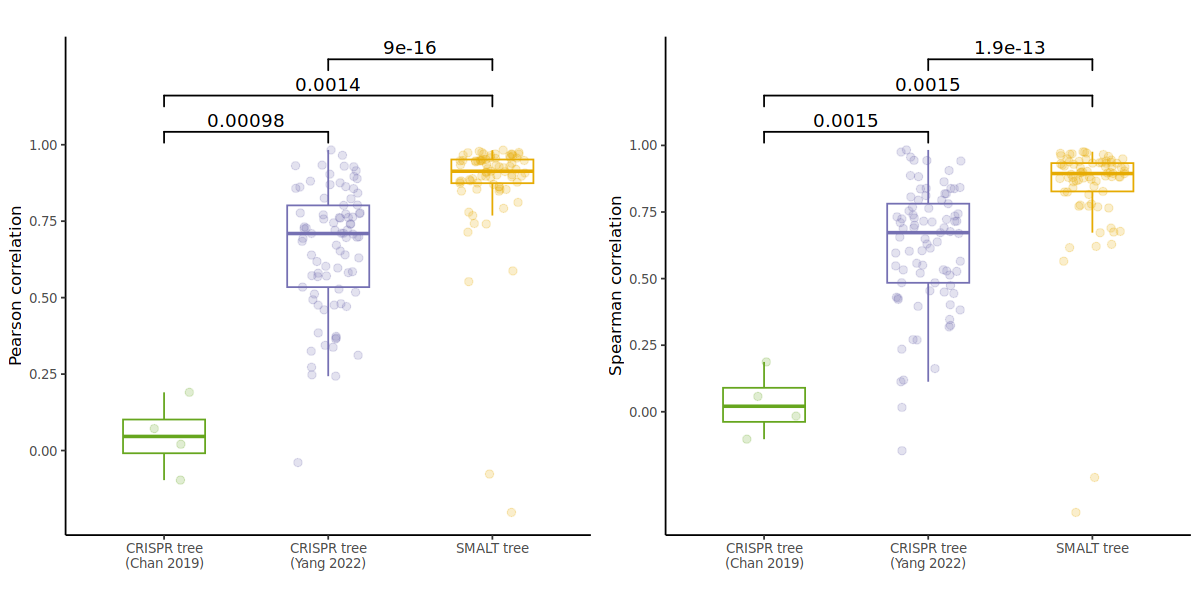